In [5]:
import pandas as pd
from sklearn.datasets import load_iris

In [101]:
from scipy.spatial.distance import mahalanobis
import scipy as sp
import pandas as pd

def mahalanobisR(X,meanCol,IC):
    m = []
    for i in range(X.shape[0]):
        m.append(mahalanobis(X.iloc[i,:],meanCol,IC)**2)
    return(m)

dat = load_iris()
df = pd.DataFrame(dat.data, columns=dat.feature_names)

x = df
mean = df.mean().values
Sx = sp.linalg.inv(df.cov().values)

mR = mahalanobisR(x, mean, Sx)

In [103]:
# note these are d^2
mR[:5]

[2.1516696621207365,
 2.8103042465308099,
 2.0780381477455738,
 2.4466380693259606,
 2.5087541001836695]

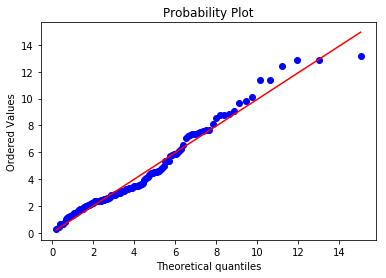

In [105]:
from scipy import stats
import matplotlib.pyplot as plt

_ = stats.probplot(mR, 4, dist='chi2', plot=plt)

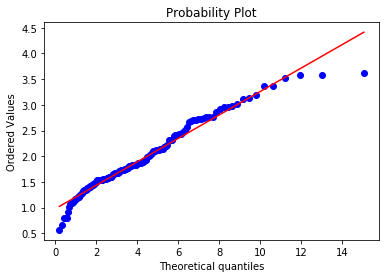

In [106]:
_ = stats.probplot([np.sqrt(x) for x in mR], 4, dist='chi2', plot=plt)

In [60]:
from scipy.spatial.distance import cdist

In [70]:
mH2 = cdist(mean.reshape(1, -1), x.values, 'mahalanobis', VI=None)

In [71]:
mH2.flatten()[:5]

array([ 1.47177118,  1.68201229,  1.44636949,  1.56941341,  1.58921093])

In [45]:
from sklearn.neighbors import DistanceMetric

In [47]:
dist = DistanceMetric.get_metric('mahalanobis', VI=Sx)

In [64]:
dist.pairwise(x.values, x.mean().values.reshape(1, -1)).flatten()

array([ 1.46685707,  1.67639621,  1.4415402 ,  1.56417329,  1.5839047 ,
        1.98916703,  1.70486387,  1.35879215,  1.83262325,  1.52915453,
        1.82053687,  1.67807027,  1.60201685,  1.89410431,  2.96125191,
        3.13616444,  2.40947635,  1.52950167,  2.12839008,  1.87570664,
        1.61941323,  1.72639381,  1.91677172,  1.49784597,  2.31789956,
        1.54890285,  1.33577712,  1.48664909,  1.58000409,  1.57259064,
        1.40209236,  2.14251571,  2.92181799,  2.71035122,  1.52915453,
        1.8433049 ,  2.3078142 ,  1.52915453,  1.77278082,  1.37720816,
        1.60319234,  3.37552195,  1.82664326,  1.9330373 ,  2.14367708,
        1.71940718,  2.12956607,  1.53872261,  1.74626806,  1.38611108,
        2.10865546,  0.79379874,  1.73606138,  1.89954741,  1.42924507,
        1.82323701,  1.13562179,  2.07015124,  1.6506995 ,  1.77989221,
        2.76530506,  0.65878801,  2.74087595,  1.24433469,  1.01972795,
        1.66857166,  1.86971805,  1.81537651,  2.72772977,  1.46

In [56]:
x.mean()

sepal length (cm)    5.843333
sepal width (cm)     3.054000
petal length (cm)    3.758667
petal width (cm)     1.198667
dtype: float64

In [57]:
mean2d

array([[ 2.55 ,  2.375,  2.35 ,  2.35 ,  2.55 ,  2.85 ,  2.425,  2.525,
         2.225,  2.4  ,  2.7  ,  2.5  ,  2.325,  2.125,  2.8  ,  3.   ,
         2.75 ,  2.575,  2.875,  2.675,  2.675,  2.675,  2.35 ,  2.65 ,
         2.575,  2.45 ,  2.6  ,  2.6  ,  2.55 ,  2.425,  2.425,  2.675,
         2.725,  2.825,  2.4  ,  2.4  ,  2.625,  2.4  ,  2.225,  2.55 ,
         2.525,  2.1  ,  2.275,  2.675,  2.8  ,  2.375,  2.675,  2.35 ,
         2.675,  2.475,  4.075,  3.9  ,  4.1  ,  3.275,  3.85 ,  3.575,
         3.975,  2.9  ,  3.85 ,  3.3  ,  2.875,  3.65 ,  3.3  ,  3.775,
         3.35 ,  3.9  ,  3.65 ,  3.4  ,  3.6  ,  3.275,  3.925,  3.55 ,
         3.8  ,  3.7  ,  3.725,  3.85 ,  3.95 ,  4.1  ,  3.725,  3.2  ,
         3.2  ,  3.15 ,  3.4  ,  3.85 ,  3.6  ,  3.875,  4.   ,  3.575,
         3.5  ,  3.325,  3.425,  3.775,  3.4  ,  2.9  ,  3.45 ,  3.525,
         3.525,  3.675,  2.925,  3.475,  4.525,  3.875,  4.525,  4.15 ,
         4.375,  4.825,  3.4  ,  4.575,  4.2  ,  4.85 ,  4.2  , 

In [75]:
from scipy.stats import chi2

In [92]:
pval = 1 - chi2.cdf(mR, 4)

In [94]:
pval < 0.05

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [98]:
_ = stats.probplot(mR, dist='norm', plot=plt)

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [ ]:
np.random.uniform()

In [82]:
import numpy as np

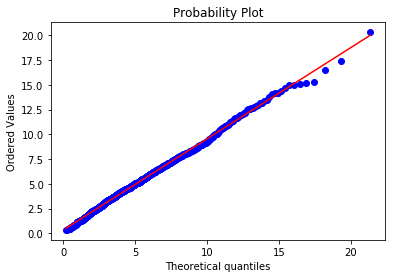

In [89]:
df = 5
measurements = np.random.chisquare(df, 1000)
_ = stats.probplot(measurements, df, dist='chi2', plot=plt)